In [2]:
import sys
sys.path.append("..")
sys.path.append("../relational-networks")
import torch
import torch.nn
import numpy as np
from model2 import RN
from original_models2 import Model as SAE
from torch.utils.data import DataLoader
from utils import ClevrDataset, preprocess_batch__, PhotoBwDataset


# params
weights_dirs = ["../models/w-r0-k1", "../models/w-r1-k0", "../models/w-r1-k1"]
prob_dir = "/home/sontung/thesis/photorealistic-blocksworld/blocks-5-3-old"
val_dir = "/home/sontung/thesis/photorealistic-blocksworld/blocks-4-3-old"
clevr_dir = "/home/sontung/thesis/clevr/data/CLEVR_v1.0"
nb_epochs = 100
dev = "cuda"

# models and loss
vae = SAE(mode="nocvae")
vae.to("cuda")
vae.eval()

val_loader = DataLoader(ClevrDataset(train=True, howmany=10, clevr_dir=clevr_dir, im_only=True, preloading=-1),
                        batch_size=8, shuffle=True, pin_memory=False, num_workers=4)
val_loader2 = DataLoader(PhotoBwDataset(),
                         batch_size=8, shuffle=True, pin_memory=False, num_workers=4)

loaded 10 questions: tensor([[29, 26, 25, 17, 21, 23, 49, 36, 16, 17, 50, 49, 12,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 2, 25, 52, 51, 43, 42, 17, 40, 64, 24, 32, 16, 17, 37, 64, 27, 53, 29,
         60, 16, 21, 23, 65,  1, 57, 58, 16, 54, 12,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  2, 47, 15,  6, 16, 17, 18, 26, 20, 17,  4, 41, 49, 12,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 2, 25, 52, 22, 64, 43, 42, 17, 22, 64, 55, 53, 29, 19, 25, 54, 12,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [25,  2, 47, 15, 43, 31, 73, 17, 18, 19, 20, 17, 22, 43, 12,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

In [3]:
im_real = []
for question, answer, image in val_loader:
    question = question.to(dev)
    answer = answer.to(dev)
    image = image.to(dev)
    question, answer, image = preprocess_batch__(question, answer, image)
    im_real.append(image)
    break
for image in val_loader2:
    image = image.to(dev)
    im_real.append(image)
    break
im_real2 = im_real[:]
for weights_dir in weights_dirs:
    vae.load_state_dict(torch.load(weights_dir, map_location="cuda"))
    with torch.no_grad():
        for batch in im_real:
            loss, recon_loss, _, x_recon = vae(batch)
            im_real2.append(x_recon)
im_real = torch.cat(im_real2, dim=0).cpu()
print(im_real.size())

torch.Size([64, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


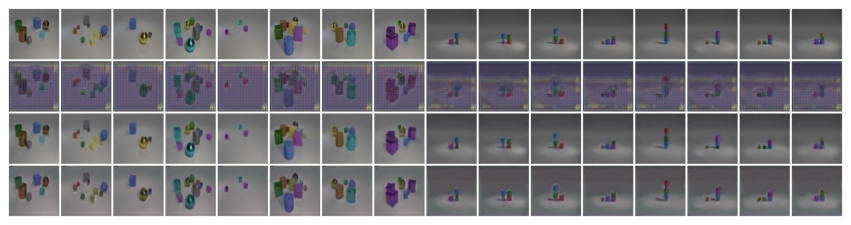

In [4]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(np.transpose(make_grid(im_real, padding=5, normalize=False, pad_value=50, nrow=16),
                        (1, 2, 0)))

plt.savefig("recon.png", transparent=True, bbox_inches='tight')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([8, 3, 128, 128])


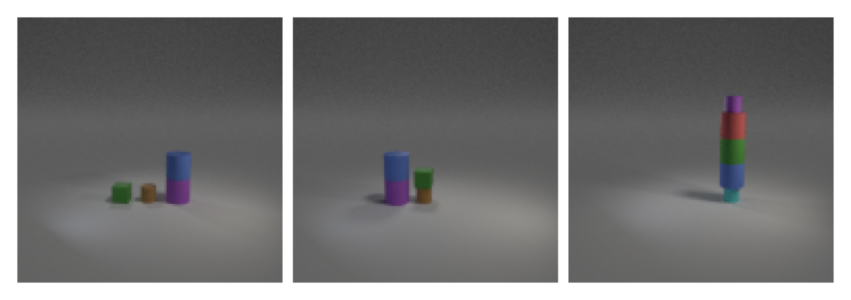

In [8]:
im_real = []
# for question, answer, image in val_loader:
#     question = question.to(dev)
#     answer = answer.to(dev)
#     image = image.to(dev)
#     question, answer, image = preprocess_batch__(question, answer, image)
#     im_real.append(image)
#     break

for image in val_loader2:
    image = image.to(dev)
    im_real.append(image)
    break

im_real2 = im_real[:]
# for weights_dir in weights_dirs[:-1]:
#     vae.load_state_dict(torch.load(weights_dir, map_location="cuda"))
#     with torch.no_grad():
#         for batch in im_real:
#             loss, recon_loss, _, x_recon = vae(batch)
#             im_real2.append(x_recon)
im_real = torch.cat(im_real2, dim=0).cpu()
print(im_real.size())

plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(np.transpose(make_grid(im_real[:3], padding=5, normalize=False, pad_value=50, nrow=8),
                        (1, 2, 0)))

plt.savefig("recon2.png", transparent=True, bbox_inches='tight')